In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from pygame import mixer  
from random import randrange

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
num_classes = 7 
batch_size = 256
epochs = 25

In [3]:
with open("fer2013/fer2013.csv") as f:
    content = f.readlines()
lines = np.array(content)
num_of_instances = lines.size
print("Number of Instances: ",num_of_instances)
print("Instance Length: ",len(lines[1].split(",")[1].split(" ")))

Number of Instances:  35888
Instance Length:  2304


In [5]:
x_train, y_train, x_test, y_test = [], [], [], []
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")          
        val = img.split(" ")            
        pixels = np.array(val, 'float32')        
        emotion = keras.utils.to_categorical(emotion, num_classes)    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("", end="")

In [7]:
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')
print(x_train.shape[0], 'Train Samples')
print(x_test.shape[0], 'Test Samples')

28709 Train Samples
3589 Test Samples


In [21]:
model = Sequential()
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [17]:
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [18]:
fit = True
if fit == True:
    #model.fit_generator(x_train, y_train, epochs=epochs) 
    model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) 
else:
    model.load_weights('facial_expression_model_weights.h5') 

Epoch 1/25
256/256 [==============================] - 704s 3s/step - loss: 1.7922 - acc: 0.2587
Epoch 2/25
256/256 [==============================] - 689s 3s/step - loss: 1.5625 - acc: 0.3795
Epoch 3/25
256/256 [==============================] - 707s 3s/step - loss: 1.3894 - acc: 0.4640
Epoch 4/25
256/256 [==============================] - 720s 3s/step - loss: 1.2815 - acc: 0.5076
Epoch 5/25
256/256 [==============================] - 699s 3s/step - loss: 1.1945 - acc: 0.5446
Epoch 6/25
256/256 [==============================] - 673s 3s/step - loss: 1.1351 - acc: 0.5697
Epoch 7/25
256/256 [==============================] - 676s 3s/step - loss: 1.0733 - acc: 0.5954
Epoch 8/25
256/256 [==============================] - 675s 3s/step - loss: 1.0248 - acc: 0.6146
Epoch 9/25
256/256 [==============================] - 675s 3s/step - loss: 0.9655 - acc: 0.6374
Epoch 10/25
256/256 [==============================] - 677s 3s/step - loss: 0.9168 - acc: 0.6547
Epoch 11/25
256/256 [==================

In [20]:
model.save('model25.h5')
model.save_weights("model25_weight.h5")

In [8]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train Loss:', train_score[0])
print('Train Accuracy:', 100*train_score[1])
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', test_score[0])
print('Test Accuracy:', 100*test_score[1])

Train Loss: 0.14504007763584237
Train Accuracy: 95.07819847434602
Test Loss: 2.5765576710704976
Test Accuracy: 56.56171635636117


[INFO] loading model...
Taken Snapshot


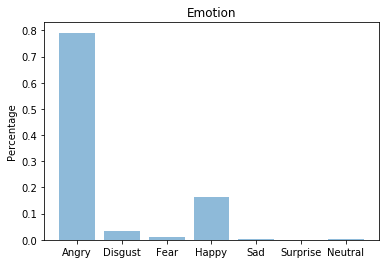

Detected Emotion: Angry
No songs are available for the detected emotion
Taken Snapshot


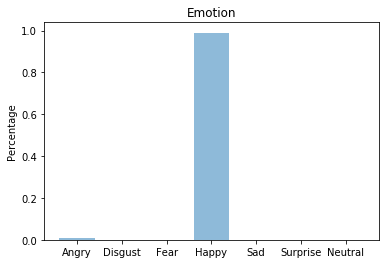

Detected Emotion: Happy
Name of the song :sample_5.mp3
Taken Snapshot


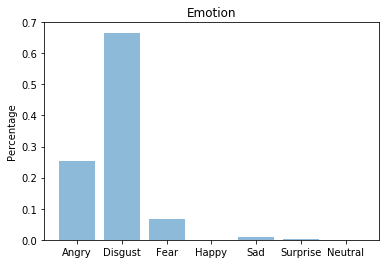

Detected Emotion: Disgust
No songs are available for the detected emotion
Exiting from the application.....


In [12]:
def emotion_analysis(emotions):
    y_pos = np.arange(len(objects))    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Percentage')
    plt.title('Emotion')    
    plt.show()

currently_playing_song = None
model = load_model('model25.h5')
objects = ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral')
face_model = "res10_300x300_ssd_iter_140000.caffemodel"
prototxt = "deploy.prototxt.txt"
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(prototxt, face_model)
cv2.namedWindow("Emotion Based Music Player", cv2.WINDOW_NORMAL)
vc = cv2.VideoCapture(0)
rval, frame = vc.read()
while True: 
    if frame is not None:     
        frame = cv2.flip(frame, 1) 
        keypress = cv2.waitKey(1)
        (h, w) = frame.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
        net.setInput(blob)
        detections = net.forward()
        for i in range(0, detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.5:
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")
                cropped_face = frame[startY:endY , startX:endX]
                text = "{:.2f}%".format(confidence * 100)
                y = startY - 10 if startY - 10 > 10 else startY + 10
                cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 0, 255), 2)
                cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
                keypress = cv2.waitKey(1)
                if keypress == ord('s'):
                    print("Taken Snapshot")
                    cv2.imwrite("Original_Cropped.jpg", cropped_face)
                    file = 'Original_Cropped.jpg'
                    true_image = image.load_img(file)
                    img = image.load_img(file, grayscale=True, target_size=(48, 48))                   
                    x = image.img_to_array(img)
                    x = np.expand_dims(x, axis = 0)
                    x /= 255
                    custom = model.predict(x)
                    emotion_analysis(custom[0])
                    files = os.listdir(objects[np.argmax(custom[0])])                   
                    print('Detected Emotion: ' + objects[np.argmax(custom[0])])
                    if len(files) == 0:
                        mixer.init()
                        mixer.music.stop()
                        print("No songs are available for the detected emotion")
                    else:                                                
                        song_name = files[randrange(len(files))]
                        while song_name == currently_playing_song:
                            song_name = files[randrange(len(files))]
                        currently_playing_song = song_name                                                
                        print('Name of the song :' + song_name)
                        selected = objects[np.argmax(custom[0])] + '/' + song_name
                        mixer.init()
                        mixer.music.stop()
                        mixer.music.load(selected)
                        mixer.music.play(-1)                            
    if keypress == ord('q'):
        mixer.init()
        mixer.music.stop()
        print("Exiting from the application.....")
        break
    cv2.imshow("Emotion Based Music Player",frame)
    rval, frame = vc.read()   
vc.release()
cv2.destroyAllWindows()